## Importing Libraries etc

In [1]:
#general imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#scipy for testing
import scipy
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.stats.api as sms

# sklearn for distribution transforming
from sklearn.preprocessing import QuantileTransformer

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for fitting the distribution
from fitter import Fitter, get_common_distributions, get_distributions

# other libraries
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

## Reading and preparing the dataset

In [3]:
path_to_data = 'C:/Users/dansi/OneDrive/Документы/Files/Data science/Bachelorseminar Cinedom/Data/Input Distributions.csv'
df = pd.read_csv(path_to_data)

In [4]:
df.head()

,interarrival People,interarrival time,ticket machine,ticket cashier,Snack #People,snack queue,snack ordering,snack preparing,snack paying,Total time Snackbar
0,6.0,0.0,72.0,49.0,2,376.77,43.81,23.39,10.70,454.67
1,2.0,17.0,42.0,112.0,2,75.18,23.80,22.16,39.97,161.11
2,2.0,4.0,57.0,87.0,2,25.85,27.81,5.80,1.42,60.88
3,2.0,6.0,64.0,54.0,2,16.29,14.11,62.04,28.84,121.28
4,2.0,13.0,59.0,46.0,2,76.55,21.11,25.82,38.33,161.81


In [5]:
df.describe()

,interarrival People,interarrival time,ticket machine,ticket cashier,Snack #People,snack queue,snack ordering,snack preparing,snack paying,Total time Snackbar
count,66.000000,66.000000,29.000000,27.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2.833333,9.212121,67.965517,78.481481,2.115942,235.238261,29.614348,41.674058,26.834203,333.360870
std,1.514883,6.710532,13.184089,28.823562,0.653863,195.198585,20.423795,25.269330,29.855605,202.755166
min,1.000000,0.000000,42.000000,34.000000,1.000000,10.650000,5.070000,1.480000,1.180000,60.880000
25%,2.000000,4.000000,59.000000,58.500000,2.000000,68.720000,13.900000,22.160000,11.540000,161.920000
50%,2.000000,7.500000,67.000000,77.000000,2.000000,217.890000,24.080000,33.050000,18.880000,298.040000
75%,3.000000,13.000000,74.000000,97.500000,2.000000,358.090000,40.500000,62.040000,29.180000,468.490000
max,11.000000,28.000000,103.000000,138.000000,4.000000,869.070000,109.800000,96.610000,192.790000,949.490000


In [44]:
# choose every column and only the columns with values
interarrival_people = df.loc[:65,'interarrival People']
interarrival_time = df.loc[:65,'interarrival time']
ticket_machine = df.loc[:28,'ticket machine']
ticket_cashier = df.loc[:26,'ticket cashier']
snack_people = df.loc[:68,'Snack #People']
snack_queue = df.loc[:68,'snack queue']
snack_ordering = df.loc[:68,'snack ordering']
snack_preparing = df.loc[:68,'snack preparing']
snack_paying = df.loc[:68,'snack paying']
total_time_snackbar = df.loc[:68,'Total time Snackbar']

# for the new model
OrderSnack = df.loc[:68,'snack ordering'] + df.loc[:68,'snack paying']
OrderTicketAndSnack = df.loc[:68,'snack ordering'] + df.loc[:68,'snack paying'] + df.loc[:28,'ticket machine']
OrderTicketAndSnack = OrderTicketAndSnack.dropna()
OrderTicket = df.loc[:28,'ticket machine']

## Is there a correlation between time and group sizes?

In [45]:
# correlation with every variable
correlation = df.corr(method='pearson')
corr = round(correlation['Snack #People'],2)
corr

interarrival People   -0.01
interarrival time     -0.04
ticket machine         0.25
ticket cashier         0.00
Snack #People          1.00
snack queue            0.14
snack ordering         0.11
snack preparing        0.22
snack paying           0.33
Total time Snackbar    0.22
Name: Snack #People, dtype: float64

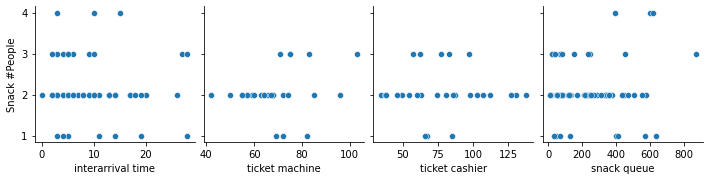

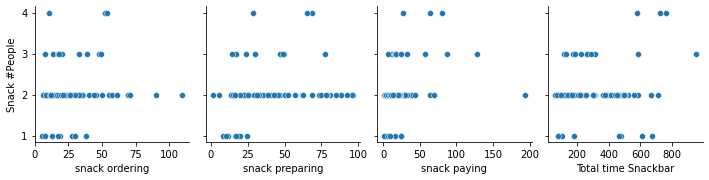

In [46]:
pp1 = sns.pairplot(data=df,
                  y_vars=['Snack #People'],
                  x_vars=['interarrival time', 'ticket machine', 'ticket cashier', 'snack queue'])

pp2 = sns.pairplot(data=df,
                  y_vars=['Snack #People'],
                  x_vars=['snack ordering', 'snack preparing', 'snack paying', 'Total time Snackbar'])

## Distribution analysis

The parameters which we need in AnyLogic (source: https://anylogic.help/)

lognormal(double mu, double sigma, double min)
- mu -The mean of the included Normal.
- sigma - The standard deviation of the included Normal.
- min - The minimum x value.

gamma(double alpha, double beta, double min)
- alpha - The shape parameter > 0.
- beta - The scale parameter > 0.
- min - The minimum x value.

exponential(double lambda, double min)
- lambda - The shape parameter.
- min - The minimum x value.

chi2(double nu, double min)
- nu - The shape parameter.
- min - The minimum x value.

## INTERARRIVAL TIME

In [47]:
f = Fitter(interarrival_time, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
lognorm,0.723640,767.563414,-285.296734,inf
chi2,0.729878,755.651969,-284.730177,inf
gamma,0.729878,755.650875,-284.730158,inf
norm,0.767319,765.987994,-285.618202,inf
expon,0.776713,752.051396,-284.815108,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


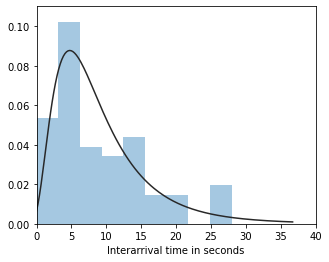

In [48]:
sns.distplot(interarrival_time, bins=9, kde=False, fit=stats.lognorm);
plt.xlim(interarrival_time.min(),40)
plt.ylim(0,0.11)
plt.xlabel('Interarrival time in seconds')
plt.show()

In [49]:
shape, loc, scale = stats.lognorm.fit(interarrival_time)

print('Parameters used for Anylogic:')
np.log(scale), shape, interarrival_time.min()  # mu, sigma, xmin

Parameters used for Anylogic:


(2.2120881844700757, 0.5943060436558889, 0.0)

## TICKET MACHINE

In [50]:
f = Fitter(ticket_machine, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
lognorm,0.117150,896.178997,-149.734325,inf
gamma,0.117264,894.625832,-149.706169,inf
norm,0.118263,897.078247,-152.827587,inf
uniform,0.129707,826.174773,-150.148829,inf
expon,0.136066,890.280838,-148.760848,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


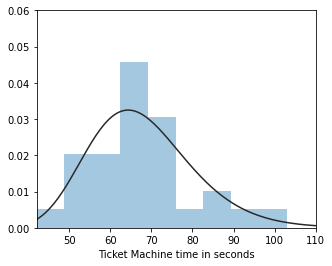

In [51]:
sns.distplot(ticket_machine, bins=9, kde=False, fit=stats.lognorm);
plt.xlim(ticket_machine.min(),110)
plt.ylim(0,0.06)
plt.xlabel('Ticket Machine time in seconds')
plt.show()

In [52]:
shape, loc, scale = stats.lognorm.fit(ticket_machine)

print('Parameters used for Anylogic:')
np.log(scale), shape, ticket_machine.min()  # mu, sigma, xmin

Parameters used for Anylogic:


(4.159038310216643, 0.19555768039755267, 42.0)

## TICKET CASHIER

In [53]:
f = Fitter(ticket_cashier, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
lognorm,0.027385,979.391559,-176.239789,inf
chi2,0.027391,977.977491,-176.233584,inf
gamma,0.027391,977.977498,-176.233583,inf
uniform,0.027534,932.878180,-179.389160,inf
norm,0.027545,975.969618,-179.378121,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


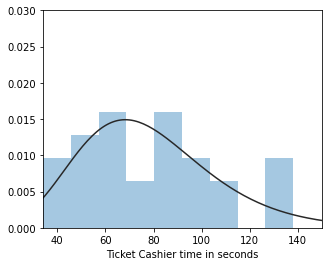

In [54]:
sns.distplot(ticket_cashier, bins=9, kde=False, fit=stats.lognorm);
plt.xlim(ticket_cashier.min(), 150)
plt.ylim(0,0.03)
plt.xlabel('Ticket Cashier time in seconds')
plt.show()

In [55]:
shape, loc, scale = stats.lognorm.fit(ticket_cashier)

print('Parameters used for Anylogic:')
np.log(scale), shape, ticket_cashier.min()  # mu, sigma, xmin

Parameters used for Anylogic:


(4.694441638519996, 0.2525658186837886, 34.0)

### SNACK QUEUE

In [56]:
f = Fitter(snack_queue, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
expon,0.000203,1469.073198,-870.242696,inf
gamma,0.000222,1483.025393,-859.933948,inf
norm,0.000280,1516.151888,-848.195199,inf
uniform,0.000318,1355.018698,-839.481658,inf
lognorm,0.000488,1751.953916,-805.644219,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


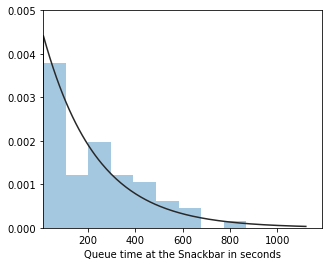

In [57]:
sns.distplot(snack_queue, bins=9, kde=False, fit=stats.expon);
plt.xlim(snack_queue.min())
plt.ylim(0,0.005)
plt.xlabel('Queue time at the Snackbar in seconds')
plt.show()

In [58]:
fitted_expon = stats.expon.fit(snack_queue)
print('Parameters used for Anylogic:')
print(fitted_expon) # shape, xmin

Parameters used for Anylogic:
(10.65, 224.58826086956518)


## SNACK ORDERING

In [59]:
f = Fitter(snack_ordering, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
gamma,0.009288,1087.309824,-602.306884,inf
expon,0.010427,1070.793336,-598.554709,inf
norm,0.012280,1200.270191,-587.272260,inf
uniform,0.018267,934.277122,-559.869373,inf
lognorm,0.055887,1277.794243,-478.475780,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


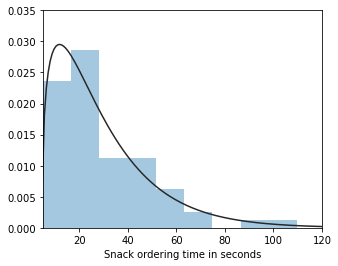

In [60]:
sns.distplot(snack_ordering, bins=9, kde=False, fit=stats.gamma);
plt.xlim(snack_ordering.min(), 120)
plt.ylim(0,0.035)
plt.xlabel('Snack ordering time in seconds')
plt.show()

In [61]:
shape, loc, scale = stats.gamma.fit(snack_ordering)

print('Parameters used for Anylogic:')
shape, scale, snack_ordering.min()  # shape, scale, xmin

Parameters used for Anylogic:


(1.4012504141367705, 17.721576271388223, 5.07)

## SNACK PREPARING

In [62]:
f = Fitter(snack_preparing, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
gamma,0.012074,964.757986,-584.200560,inf
norm,0.013689,960.709149,-579.774192,inf
uniform,0.013784,915.048875,-579.297387,inf
expon,0.015019,979.420609,-573.379512,inf
lognorm,0.052593,1237.092647,-482.667357,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


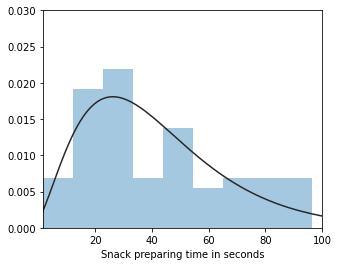

In [63]:
sns.distplot(snack_preparing, bins=9, kde=False, fit=stats.gamma);
plt.xlim(snack_preparing.min(), 100)
plt.ylim(0,0.030)
plt.xlabel('Snack preparing time in seconds')
plt.show()

In [64]:
shape, loc, scale = stats.gamma.fit(snack_preparing)

print('Parameters used for Anylogic:')
shape, scale, snack_preparing.min()  # shape, scale, xmin

Parameters used for Anylogic:


(2.8497479794533622, 15.513728095518992, 1.48)

## SNACK PAYING

In [65]:
f = Fitter(snack_paying, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
lognorm,0.002526,1400.216019,-692.158157,inf
expon,0.003492,1399.836644,-674.033507,inf
norm,0.006107,1774.073149,-635.471883,inf
uniform,0.010720,1055.092411,-596.641863,inf
gamma,0.023680,9832.388370,-537.727278,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


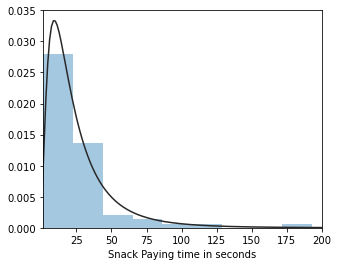

In [66]:
sns.distplot(snack_paying, bins=9, kde=False, fit=stats.lognorm);
plt.xlim(snack_paying.min(),200)
plt.ylim(0,)
plt.xlabel('Snack Paying time in seconds')
plt.show()

In [67]:
shape, loc, scale = stats.lognorm.fit(snack_paying)

print('Parameters used for Anylogic:')
np.log(scale), shape, snack_paying.min()  # mu, sigma, xmin

Parameters used for Anylogic:


(3.0277285411024155, 0.7900862451159358, 1.18)

## TOTAL TIME SNACKBAR

In [68]:
f = Fitter(total_time_snackbar, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
chi2,0.000190,1450.861596,-870.839040,inf
gamma,0.000190,1450.861655,-870.839038,inf
expon,0.000195,1451.631989,-873.141238,inf
norm,0.000216,1484.003318,-866.206592,inf
uniform,0.000243,1361.931689,-857.906825,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


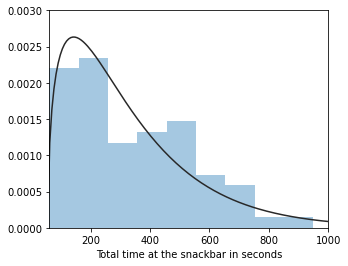

In [69]:
sns.distplot(total_time_snackbar, bins=9, kde=False, fit=stats.chi2);
plt.xlim(total_time_snackbar.min(),1000)
plt.ylim(0,0.003)
plt.xlabel('Total time at the snackbar in seconds')
plt.show()

In [70]:
shape, loc, scale = stats.chi2.fit(total_time_snackbar)

print('Parameters used for Anylogic:')
shape, total_time_snackbar.min()  # shape, xmin

Parameters used for Anylogic:


(2.9063705486387326, 60.88)

## -------------------------------------------------------------------------------------------------------------------------------

## Special distributions for the new model

In [71]:
# for the new model
OrderSnack = df.loc[:68,'snack ordering'] + df.loc[:68,'snack paying']
OrderTicketAndSnack = df.loc[:68,'snack ordering'] + df.loc[:68,'snack paying'] + df.loc[:28,'ticket machine']
OrderTicketAndSnack = OrderTicketAndSnack.dropna()
OrderTicket = df.loc[:28,'ticket machine']

## OrderingSnackNew

In [72]:
f = Fitter(OrderSnack, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
lognorm,0.004221,1278.962930,-656.722634,inf
expon,0.005705,1234.942145,-640.161738,inf
norm,0.006090,1429.782806,-635.660705,inf
uniform,0.008201,1069.390683,-615.124783,inf
chi2,0.033318,2414.335599,-514.164481,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


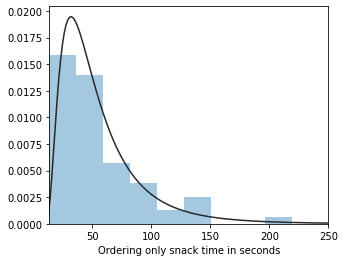

In [73]:
sns.distplot(OrderSnack, bins=9, kde=False, fit=stats.lognorm);
plt.xlim(OrderSnack.min(),250)
plt.ylim(0,)
plt.xlabel('Ordering only snack time in seconds')
plt.show()

In [74]:
shape, loc, scale = stats.lognorm.fit(OrderSnack)

print('Parameters used for Anylogic:')
np.log(scale), shape, OrderSnack.min()  # mu, sigma, xmin

Parameters used for Anylogic:


(3.628494724903264, 0.691352671289218, 13.46)

## OrderingTicketAndSnackNew

In [75]:
f = Fitter(OrderTicketAndSnack, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
expon,0.011424,1263.745053,-220.606905,inf
norm,0.014498,1333.627157,-213.694993,inf
lognorm,0.017193,1444.099037,-205.384665,inf
uniform,0.017245,1045.940942,-208.664033,inf
gamma,0.020808,5256.056722,-199.850484,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


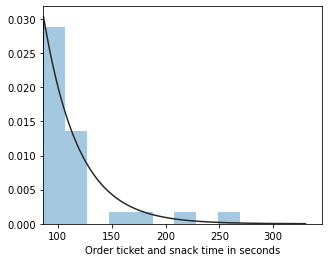

In [76]:
sns.distplot(OrderTicketAndSnack, bins=9, kde=False, fit=stats.expon);
plt.xlim(OrderTicketAndSnack.min(),)
plt.ylim(0,)
plt.xlabel('Order ticket and snack time in seconds')
plt.show()

In [77]:
fitted_expon = stats.expon.fit(OrderTicketAndSnack)
print('Parameters used for Anylogic:')
print(fitted_expon) # shape, xmin

Parameters used for Anylogic:
(86.22999999999999, 32.47344827586208)


## OrderingTicketNew

In [78]:
f = Fitter(OrderTicket, 
           distributions=['chi2',
                         'expon',
                         'gamma',
                         'lognorm',
                         'norm',
                         'uniform'])
f.fit()
f.summary(plot=False)

,sumsquare_error,aic,bic,kl_div
lognorm,0.117150,896.178997,-149.734325,inf
gamma,0.117264,894.625832,-149.706169,inf
norm,0.118263,897.078247,-152.827587,inf
uniform,0.129707,826.174773,-150.148829,inf
expon,0.136066,890.280838,-148.760848,inf


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


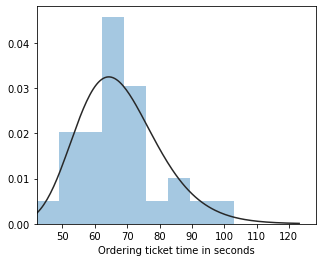

In [79]:
sns.distplot(OrderTicket, bins=9, kde=False, fit=stats.lognorm);
plt.xlim(OrderTicket.min(),)
plt.ylim(0,)
plt.xlabel('Ordering ticket time in seconds')
plt.show()

In [80]:
shape, loc, scale = stats.lognorm.fit(OrderTicket)

print('Parameters used for Anylogic:')
np.log(scale), shape, OrderTicket.min()  # mu, sigma, xmin

Parameters used for Anylogic:


(4.159038310216643, 0.19555768039755267, 42.0)